In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("house_price_data.csv")
df = df.dropna()

In [5]:
df = df.drop(["property_id"], axis=1)

In [6]:
# Encode categorical variables and drop NULL values
df = pd.get_dummies(df, drop_first=True, dtype='int')
df.head()

,distance_to_city_center,distance_to_metro,distance_to_school,crime_rate,house_age,total_area,bedrooms,bathrooms,floors,garage,...,heating_type_Gas,energy_efficiency_B,energy_efficiency_C,energy_efficiency_D,energy_efficiency_E,energy_efficiency_F,energy_efficiency_G,season_sold_Spring,season_sold_Summer,season_sold_Winter
0,6.6,908,296,1.0,22,103,3,3,1,1,...,1,0,0,1,0,0,0,0,0,1
1,2.6,84,30,1.0,12,114,2,2,2,1,...,1,0,0,0,0,0,0,0,0,0
2,10.2,50,120,1.0,21,83,5,3,1,1,...,0,0,1,0,0,0,0,0,1,0
3,5.1,475,48,1.0,0,127,3,1,2,1,...,0,0,0,1,0,0,0,0,0,1
4,0.5,647,111,1.0,21,59,6,2,2,0,...,0,0,1,0,0,0,0,0,0,0


In [4]:
df.head()

,property_id,neighborhood,distance_to_city_center,distance_to_metro,distance_to_school,crime_rate,house_age,total_area,bedrooms,bathrooms,...,construction_quality,renovation_status,heating_type,air_conditioning,parking_spaces,energy_efficiency,listing_duration,season_sold,year_sold,sale_price
0,PROP_000001,Forest Glen,6.6,908,296,1.0,22,103,3,3,...,Basic,Full,Gas,0,2,D,1,Winter,2022,342.8
1,PROP_000002,Lakeside,2.6,84,30,1.0,12,114,2,2,...,Standard,Never,Gas,1,0,A,17,Fall,2023,545.0
2,PROP_000003,Downtown,10.2,50,120,1.0,21,83,5,3,...,Premium,Never,Central,1,1,C,4,Summer,2021,710.1
3,PROP_000004,Riverside,5.1,475,48,1.0,0,127,3,1,...,Standard,Full,Central,1,1,D,55,Winter,2023,894.5
4,PROP_000005,Oakwood,0.5,647,111,1.0,21,59,6,2,...,Standard,Never,Central,0,0,C,15,Fall,2023,258.4


In [7]:
# Seperate features & Class Label
X = df.iloc[:, :-1]
Y = df["sale_price"]

In [9]:
# Outlier detection and removal using IQR

Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
X_filtered = X[(X >= lower_bound) & (X <= upper_bound)].dropna()
Y_filtered = Y[X_filtered.index]

X = X_filtered
Y = Y_filtered

print("Shape of X after outlier removal:", X.shape)
print("Shape of Y after outlier removal:", Y.shape)

Shape of X after outlier removal: (66, 46)
Shape of Y after outlier removal: (66,)


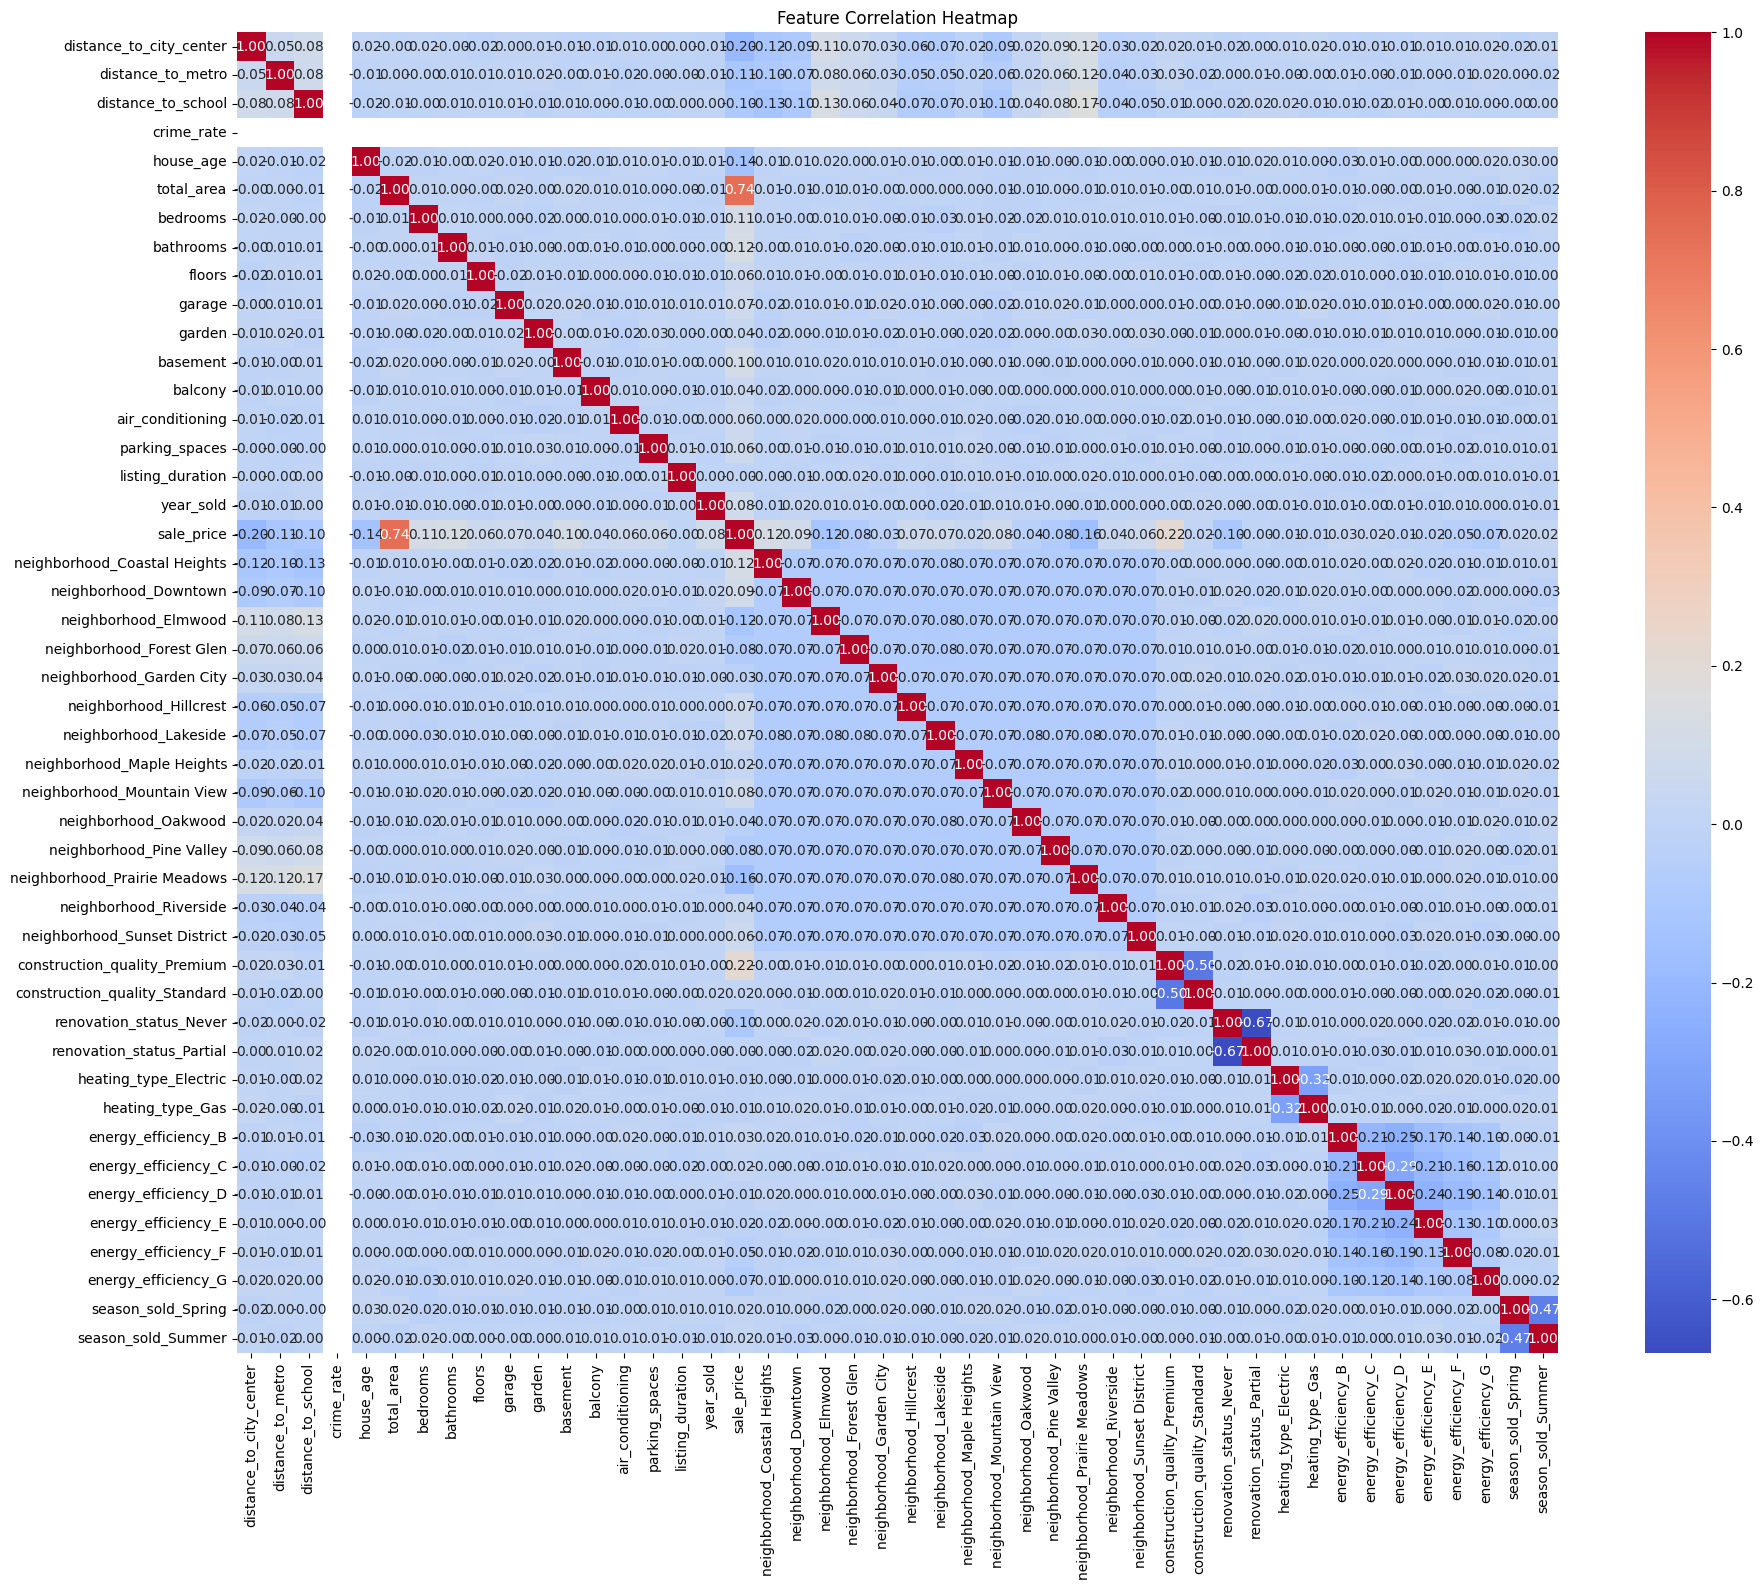

In [8]:
corr_matrix = X.corr()

# Drop all features with high +ve / -ve correlation to other variables
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8) or any(upper_tri[column] < -0.8)]
X = X.drop(to_drop, axis=1)

# Check correlation matrix
correlation_matrix = X.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

In [10]:
# Normalize
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [16]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, Y_train)

Y_pred_lr = linear_regression_model.predict(X_test)

Linear Regression Metrics:
  MAE: 0.00
  MSE: 0.00
  RMSE: 0.00
  R-squared: 1.00


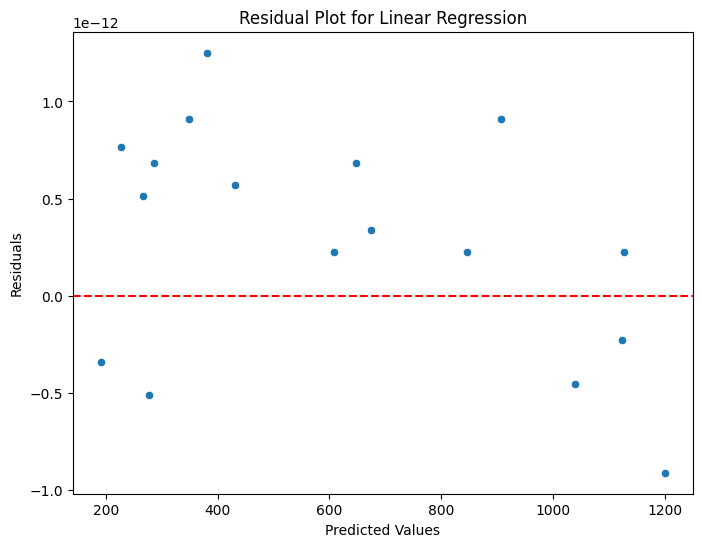

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate the Linear Regression model
mae_lr = mean_absolute_error(Y_test, Y_pred_lr)
mse_lr = mean_squared_error(Y_test, Y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(Y_test, Y_pred_lr)

print(f"Linear Regression Metrics:")
print(f"  MAE: {mae_lr:.2f}")
print(f"  MSE: {mse_lr:.2f}")
print(f"  RMSE: {rmse_lr:.2f}")
print(f"  R-squared: {r2_lr:.2f}")

# Residual Plot
residuals_lr = Y_test - Y_pred_lr

plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_pred_lr, y=residuals_lr)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Linear Regression")
plt.show()